In [1]:
## Import the required libraries

In [2]:
# Import necessary packages
from __future__ import absolute_import, division, print_function
from numpy.random import choice, uniform, randint
import numpy as np
import pandas as pd

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split

print(tf.__version__)

1.13.1


In [3]:
#Define column names
columnNames=['Company Name',
             'Plan Of Execution Submitted',
             'Skilled Resources Availability',
             'Equipment Availability',
             'Quality Of Plan Of Execution',
             'Company Rating',
             'Proposed Cost',
             'Relevance Of The Project',
             'Success Rate Of Past Projects',
             'Duration Specified By Owner',
             'Duration Specified By Bidder',
             'Number Of Projects Completed',
             'Number Of Projects Completed For This Owner'
             ]
columnNames

['Company Name',
 'Plan Of Execution Submitted',
 'Skilled Resources Availability',
 'Equipment Availability',
 'Quality Of Plan Of Execution',
 'Company Rating',
 'Proposed Cost',
 'Relevance Of The Project',
 'Success Rate Of Past Projects',
 'Duration Specified By Owner',
 'Duration Specified By Bidder',
 'Number Of Projects Completed',
 'Number Of Projects Completed For This Owner']

In [4]:
# Define categorical type columns
'''
 Defining  
 - Column           : 'Plan of execution submitted'
 - Column Type      : 'Categorical'
 - Valid values are : 'Yes', 'No'
 - Description      : 'Indicates whether the bidding company has submitted the plan of execution or not'
'''
columnPlanOfExecutionSubmitted=['Yes','No']
columnPlanOfExecutionSubmitted

['Yes', 'No']

In [5]:
'''
 Defining  
 - Column           : 'Skilled resources availability'
 - Column Type      : 'Categorical'
 - Valid values are : 'Need to recruit','Need to train','Ready'
 - Description      : 'Indicates the availability of the skilled resources'
'''
columnSkilledResourcesAvailability=['Need to recruit','Need to train','Ready']
columnSkilledResourcesAvailability

['Need to recruit', 'Need to train', 'Ready']

In [6]:
'''
 Defining  
 - Column           : 'Equipment availability'
 - Column Type      : 'Categorical'
 - Valid values are : 'Going to procure or hire','Ready'
 - Description      : 'Indicates the availability of the required equipment for executing the project'
'''
columnEquipmentAvailability=['Going to procure','Ready']
columnEquipmentAvailability

['Going to procure', 'Ready']

In [7]:
'''
 Defining  
 - Column           : 'Quality Of Plan Of Execution'
 - Column Type      : 'Categorical'
 - Valid values are : 'Excellent','Good','Average'
 - Description      : 'Indicates the quality of plan of execution'
'''
columnQualityOfPlanOfExecution=['Excellent','Good','Average']
columnQualityOfPlanOfExecution

['Excellent', 'Good', 'Average']

In [8]:
'''
 Defining  
 - Column           : 'Company Rating'
 - Column Type      : 'Real'
 - Valid values are : 'Range between 1 to 5'
 - Description      : 'Market rating for the company'
'''
columnCompanyRating={'lowerBound':3, 'upperBound':5}
columnCompanyRating

{'lowerBound': 3, 'upperBound': 5}

In [9]:
'''
 Defining  
 - Column           : 'Proposed cost'
 - Column Type      : 'Real'
 - Valid values are : 'Range between 1 to 1000000'
 - Description      : 'This is cost estimation proposed by the bidder (in lakhs)'
'''
columnProposedCost={'lowerBound':1, 'upperBound':1000000}
columnProposedCost

{'lowerBound': 1, 'upperBound': 1000000}

In [10]:
'''
 Defining  
 - Column           : 'Relevance of the project'
 - Column Type      : 'Real'
 - Valid values are : 'Range between 0 to 100'
 - Description      : 'Out of all the projects executed by the bidding company, number of projects that are 
                       relevant to the current project'
'''
columnRelevanceOfTheProject={'lowerBound':0.5, 'upperBound':1}
columnRelevanceOfTheProject

{'lowerBound': 0.5, 'upperBound': 1}

In [11]:
'''
 Defining  
 - Column           : 'Success rate of past projects'
 - Column Type      : 'Real'
 - Valid values are : 'Range between 0 to 100'
 - Description      : 'Success rate of the past projects executed by the bidding company. 
                       This will be a percentage'
'''
columnSuccessRateOfPastProjects={'lowerBound':0.5, 'upperBound':1}
columnSuccessRateOfPastProjects

{'lowerBound': 0.5, 'upperBound': 1}

In [12]:
'''
 Defining  
 - Column           : 'Duration specified by owner'
 - Column Type      : 'Int'
 - Valid values are : 'Range between 0 to 60'
 - Description      : 'Duration specified by the owner calling for bids. This duration will be 
                       in months (maximum 5 years)'
'''
columnDurationSpecifiedByOwner={'lowerBound':12, 'upperBound':60}
columnDurationSpecifiedByOwner

{'lowerBound': 12, 'upperBound': 60}

In [13]:
'''
 Defining  
 - Column           : 'Duration specified by the bidder'
 - Column Type      : 'Int'
 - Valid values are : 'Range between 0 to 60'
 - Description      : 'Duration specified by the bidder. This duration will 
                       be in months (maximum 10 years)'
'''
columnDurationSpecifiedByTheBidder={'lowerBound':12, 'upperBound':60}
columnDurationSpecifiedByTheBidder

{'lowerBound': 12, 'upperBound': 60}

In [14]:
'''
 Defining  
 - Column           : 'Number of projects completed'
 - Column Type      : 'Int'
 - Valid values are : 'Range between 0 to 100'
 - Description      : 'Number of projects completed'
'''
columnNumberOfProjectsCompleted={'lowerBound':50, 'upperBound':100}
columnNumberOfProjectsCompleted

{'lowerBound': 50, 'upperBound': 100}

In [15]:
'''
 Defining  
 - Column           : 'Number Of Projects Completed For This Owner'
 - Column Type      : 'Int'
 - Valid values are : 'Range between 0 to 100'
 - Description      : 'Number Of Projects Completed For This Owner'
'''
columnNumberOfProjectsCompletedForThisOwner={'lowerBound':25, 'upperBound':50}
columnNumberOfProjectsCompletedForThisOwner

{'lowerBound': 25, 'upperBound': 50}

In [16]:
# Function to generate data for company name
def generateDataForCompanyName(m):
    lst=[]
    for i in range(m):
        lst.append('C'+str(i+1))
    x= np.array(lst)
    return x

In [17]:
# Function to generate data for categorical type of columns
def generateDataForCategoricalColumns(lst, m):
    x = choice(lst,m)
    return x

In [18]:
# Function to generate data for real number type of columns
def generateDataForRealColumns(lower_bound, upper_bound,m):
    x = uniform(lower_bound, upper_bound,m)
    return x

In [19]:
# Function to generate data for intiger type of columns
def generateDataForIntegerColumns(lower_bound, upper_bound, m):
    x = randint(lower_bound, upper_bound, m)
    return x

In [20]:
# Function to generate data set
def generatDataset(numberOfExamplesInDataSet):
    # Create empty dataSet
    dataSet=pd.DataFrame()

    # Generate data for 'Company Name' column
    dataSet[columnNames[0]]=generateDataForCompanyName(numberOfExamplesInDataSet)

    for item in columnNames:
        # Generate data for 'Plan Of Execution Submitted' column
        if item == 'Plan Of Execution Submitted':
            dataSet[item]=generateDataForCategoricalColumns(columnPlanOfExecutionSubmitted,numberOfExamplesInDataSet)
        # Generate data for 'Skilled Resources Availability' column
        if item == 'Skilled Resources Availability':
            dataSet[item]=generateDataForCategoricalColumns(columnSkilledResourcesAvailability,numberOfExamplesInDataSet)
        # Generate data for 'Equipment Availability' column
        if item == 'Equipment Availability':
            dataSet[item]=generateDataForCategoricalColumns(columnEquipmentAvailability,numberOfExamplesInDataSet)
        # Generate data for 'Quality Of Plan Of Execution' column
        if item == 'Quality Of Plan Of Execution':
            dataSet[item]=generateDataForCategoricalColumns(columnQualityOfPlanOfExecution,numberOfExamplesInDataSet)
        # Generate data for 'Company Rating' column
        if item == 'Company Rating':
            dataSet[item]=generateDataForRealColumns(columnCompanyRating['lowerBound'], columnCompanyRating['upperBound'], numberOfExamplesInDataSet)
        # Generate data for 'Proposed Cost' column
        if item == 'Proposed Cost':
            dataSet[item]=generateDataForRealColumns(columnProposedCost['lowerBound'], columnProposedCost['upperBound'], numberOfExamplesInDataSet)
        # Generate data for 'Relevance Of The Project' column
        if item == 'Relevance Of The Project':
            dataSet[item]=generateDataForRealColumns(columnRelevanceOfTheProject['lowerBound'], columnRelevanceOfTheProject['upperBound'], numberOfExamplesInDataSet)
        # Generate data for 'Success Rate Of Past Projects' column
        if item == 'Success Rate Of Past Projects':
            dataSet[item]=generateDataForRealColumns(columnSuccessRateOfPastProjects['lowerBound'], columnSuccessRateOfPastProjects['upperBound'], numberOfExamplesInDataSet)
        # Generate data for 'Duration Specified By Owner' column
        if item == 'Duration Specified By Owner':
            dataSet[item]=generateDataForIntegerColumns(columnDurationSpecifiedByOwner['lowerBound'], columnDurationSpecifiedByOwner['upperBound'], numberOfExamplesInDataSet)
        # Generate data for 'Duration Specified By Bidder' column
        if item == 'Duration Specified By Bidder':
            dataSet[item]=generateDataForIntegerColumns(columnDurationSpecifiedByTheBidder['lowerBound'], columnDurationSpecifiedByTheBidder['upperBound'], numberOfExamplesInDataSet)
        # Generate data for 'Number of projects completed' column
        if item == 'Number Of Projects Completed':
            dataSet[item]=generateDataForIntegerColumns(columnNumberOfProjectsCompleted['lowerBound'], columnNumberOfProjectsCompleted['upperBound'], numberOfExamplesInDataSet)
        # Generate data for 'Number Of Projects Completed For This Owner' column
        if item == 'Number Of Projects Completed For This Owner':
            temp = [None] * numberOfExamplesInDataSet
            for i in range(numberOfExamplesInDataSet): 
                tempNumberOfProjectsCompleted=dataSet['Number Of Projects Completed'][i]
                if tempNumberOfProjectsCompleted <= 0:
                    tempNumberOfProjectsCompleted=1
                temp[i]=randint(columnNumberOfProjectsCompletedForThisOwner['lowerBound'],tempNumberOfProjectsCompleted)
            dataSet[item]=temp
    return dataSet

In [21]:
def generateDataForLabelForEachRow (row):
    if (row['Company Rating'] >= 3 and 
        row['Duration Specified By Bidder'] <= row['Duration Specified By Owner'] and
        (row['Number Of Projects Completed'] >= 50 and row['Relevance Of The Project'] >= 0.5 and row['Success Rate Of Past Projects'] >= 0.5) and
        row['Number Of Projects Completed For This Owner'] >= (row['Number Of Projects Completed'] / 2) and 
        row['Plan Of Execution Submitted'] == 'Yes' and
        (row['Quality Of Plan Of Execution'] == 'Excellent' or row['Quality Of Plan Of Execution'] == 'Good') and
        row['Skilled Resources Availability'] == 'Ready' and
        row['Equipment Availability'] == 'Ready'):
            return 1
    #Plan Of Execution Submitted - No
    if (row['Company Rating'] >= 3 and 
        row['Duration Specified By Bidder'] <= row['Duration Specified By Owner'] and
        (row['Number Of Projects Completed'] >= 50 and row['Relevance Of The Project'] >= 0.5 and row['Success Rate Of Past Projects'] >= 0.5) and
        row['Number Of Projects Completed For This Owner'] >= (row['Number Of Projects Completed'] / 2) and 
        row['Plan Of Execution Submitted'] == 'No' and
        (row['Quality Of Plan Of Execution'] == 'Excellent' or row['Quality Of Plan Of Execution'] == 'Good') and
        row['Skilled Resources Availability'] == 'Ready' and
        row['Equipment Availability'] == 'Ready'):
            return 1
    #Number Of Projects Completed <= 10
    if (row['Company Rating'] >= 3 and 
        row['Duration Specified By Bidder'] <= row['Duration Specified By Owner'] and
        (row['Number Of Projects Completed'] <= 10 and row['Relevance Of The Project'] >= 0.5 and row['Success Rate Of Past Projects'] >= 0.5) and
        row['Number Of Projects Completed For This Owner'] >= (row['Number Of Projects Completed'] / 2) and 
        row['Plan Of Execution Submitted'] == 'No' and
        (row['Quality Of Plan Of Execution'] == 'Excellent' or row['Quality Of Plan Of Execution'] == 'Good') and
        row['Skilled Resources Availability'] == 'Ready' and
        row['Equipment Availability'] == 'Ready'):
            return 1
    #Number Of 'Company Rating' >= 4 and 'Number Of Projects Completed' >= 50 and 'Relevance Of The Project' <= 0.5 and 'Success Rate Of Past Projects' >= 0.75
    if (row['Company Rating'] >= 4 and 
        row['Duration Specified By Bidder'] <= row['Duration Specified By Owner'] and
        (row['Number Of Projects Completed'] >= 50 and row['Relevance Of The Project'] <= 0.5 and row['Success Rate Of Past Projects'] >= 0.75) and
        row['Number Of Projects Completed For This Owner'] >= (row['Number Of Projects Completed'] / 2) and 
        row['Plan Of Execution Submitted'] == 'No' and
        (row['Quality Of Plan Of Execution'] == 'Excellent' or row['Quality Of Plan Of Execution'] == 'Good') and
        row['Skilled Resources Availability'] == 'Ready' and
        row['Equipment Availability'] == 'Ready'):
            return 1
    return 0

In [22]:
def checkDetailsOfDataSet(dataSet):
    # check number of exapmles of with targetLabel >= 0.5
    targetLabelCount1 = len(dataSet[dataSet['Target']>=0.5])
    targetLabelCount2 = len(dataSet[dataSet['Target']<0.5])
    print('Number of rows with value of targetLabel >= 0.5: ',targetLabelCount1)
    print('Number of rows with value of targetLabel < 0.5: ',targetLabelCount2)
    print()
    print('Describe dataSet: ')
    print(dataSet.describe())

In [23]:
def oneHotEncode(dataSet,categoricalColumns):
    onHotEncodedDataSet=pd.get_dummies(dataSet, columns=categoricalColumns, prefix=categoricalColumns)
    return onHotEncodedDataSet

In [24]:
#Reference: https://www.tensorflow.org/tutorials/keras/basic_classification
#Reference: https://keras.io/regularizers/
#Function to build the model
'''
The model has 10 layers
9 of the layers are the hidden layers, 1 layer is the output softmax layer
In each layer we have different number of nodes (neurons)
In the last layer we only have 2 nodes (neurons)
In each of the hidden layers, we are using the activation function as RELU
After each layer, dropout regularization is applied
In the output layer, we are using the activation function as SOFTMAX, as we want to predict the probability of the 2 classes, 
that is probability of 'Good Bid', probability of 'Bad Bid'
'''
def build_model(trainx, trainy):
    model = keras.Sequential([
        layers.Dense(10,
                     activation=tf.nn.relu, 
                     input_shape=[len(trainx.keys())]),
        layers.Dropout(0.5),
        layers.Dense(20,
                     activation=tf.nn.relu),
        layers.Dropout(0.6),
        layers.Dense(30,
                     activation=tf.nn.relu),
        layers.Dropout(0.7),
        layers.Dense(40,
                     activation=tf.nn.relu),
        layers.Dropout(0.8),
        layers.Dense(50,
                     activation=tf.nn.relu),
        layers.Dropout(0.9),
        layers.Dense(60,
                     activation=tf.nn.relu),
        layers.Dropout(0.8),
        layers.Dense(70,
                     activation=tf.nn.relu),
        layers.Dropout(0.7),
        layers.Dense(80,
                     activation=tf.nn.relu),
        layers.Dropout(0.6),
        layers.Dense(90,
                     activation=tf.nn.relu),
        layers.Dropout(0.5),
        layers.Dense(2, activation=tf.nn.softmax),
    ])
    
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  #loss=tf.keras.losses.MeanSquaredError(),
                  #loss='binary_crossentropy',
                  metrics=['accuracy'])
    return model

In [25]:
def evaluateModeTrainAccuracy(model, trainx, trainy):
    #Evaluate the loss and accuracy of the trained model, using the test dataSet
    train_loss, train_acc = model.evaluate(trainx, trainy)
    print('Model accuracy on train dataSet:', train_acc)
    print('Model loss on train dataSet:', train_loss)
    return train_acc

In [26]:
def evaluateModeTestAccuracy(model, testx, testy):
    #Evaluate the loss and accuracy of the trained model, using the test dataSet
    test_loss, test_acc = model.evaluate(testx, testy)
    print('Model accuracy on test dataSet:', test_acc)
    print('Model loss on test dataSet:', test_loss)
    return test_acc

In [30]:
#This function invoked the individual functions to 
#Generate the dataset
#Preprocess the dataset
#Split the dataset into train and test sets
#Build the model
#Fit the model
#Evaluate the model

def predictBestBidUsingDeepNeuralNetwork(numberOfExamplesInDataSet, testSetSize):
    #Start generating the dataSet
    print('****** Start generating the dataSet ******')
    dataSet=generatDataset(numberOfExamplesInDataSet)
    print('****** Completed generating the dataSet ******')
    #Completed generating the dataSet
    
    #Start preprocessing the dataSet
    print('****** Start preprocessing the dataSet ******')
    #Define Categorical columns
    categoricalColumns = ['Plan Of Execution Submitted','Skilled Resources Availability', 'Equipment Availability','Quality Of Plan Of Execution']

    # Perform OnHotEncoding to convert categorical values into one-hot encoded faculty
    onHotEncodedDataSet = oneHotEncode(dataSet,categoricalColumns)
    onHotEncodedDataSet.pop('Company Name')    
    onHotEncodedDataSet['Company Rating'] = dataSet['Company Rating']
    onHotEncodedDataSet['Proposed Cost'] = dataSet['Proposed Cost']
    onHotEncodedDataSet['Relevance Of The Project'] = dataSet['Relevance Of The Project']
    onHotEncodedDataSet['Success Rate Of Past Projects'] = dataSet['Success Rate Of Past Projects']
    onHotEncodedDataSet['Duration Specified By Owner'] = dataSet['Duration Specified By Owner']
    onHotEncodedDataSet['Duration Specified By Bidder'] = dataSet['Duration Specified By Bidder']
    onHotEncodedDataSet['Number Of Projects Completed'] = dataSet['Number Of Projects Completed']
    onHotEncodedDataSet['Number Of Projects Completed For This Owner'] = dataSet['Number Of Projects Completed For This Owner']
    
    cols=onHotEncodedDataSet.columns

    targetLabels=dataSet.apply(lambda row : generateDataForLabelForEachRow(row), axis=1)
    dataSet['Target']=targetLabels

    #Check the details of the dataSet
    #checkDetailsOfDataSet(dataSet)
    
    onHotEncodedDataSetExportToExcelTemp = onHotEncodedDataSet
    onHotEncodedDataSetExportToExcelTemp['Target']=targetLabels
    dataSetExportToExcel = dataSet.to_excel (r'D:\Personal Data\Gitam\DXC\Implementation\originalDataSet.xlsx', index = None, header=True) 
    onHotEncodedDataSetExportToExcelTemp = onHotEncodedDataSetExportToExcelTemp.to_excel (r'D:\Personal Data\Gitam\DXC\Implementation\onHotEncodedDataSet.xlsx', index = None, header=True) 
    #Don't forget to add '.xlsx' at the end of the path

    bidClassNames = ['Good Bid', 'Bad Bid']
    
    #print ('onHotEncodedDataSet: ',onHotEncodedDataSet)
    #print ('dataSet: ',dataSet)
    #print ('bidClassNames: ',bidClassNames)
    print('****** Completed preprocessing the dataSet ******')
    #Completed preprocessing the dataSet
    
    #Start spliting the dataset into Train & Test sets
    print('****** Start spliting the dataset into Train & Test sets ******')
    cols
    features=cols
    #print ('features: ',features)

    x = onHotEncodedDataSet[features]
    y = dataSet['Target']

    trainx, testx, trainy, testy = train_test_split(x,y, test_size=testSetSize, random_state=1)
    #print ('trainx: ',trainx)
    #print ('trainy: ',trainy)
    #print ('len(trainx.keys()): ', len(trainx.keys()))
    print('****** Completed spliting the dataset into Train & Test sets ******')
    #Completed spliting the dataset into Train & Test sets
    
    #Start building the model using the function build_model
    print('****** Start building the model using the function build_model ******')
    model = build_model(trainx, trainy)
    #Show summary of the model
    model.summary()    
    print('****** Completed building the model using the function build_model ******')
    #Completed building the model using the function build_model
    
    #Start training the model using the train dataSet
    print('****** Start training the model using the train dataSet ******')
    modelHistory = model.fit(trainx, trainy, epochs=10, batch_size=5000, validation_data=(testx, testy), verbose=2)    
    print('****** Completed training the model using the train dataSet ******')
    #Completed training the model using the train dataSet

    #Evaluate the model train accuracy
    print('****** Evaluate the model train accuracy ******')
    modelTrainAccuracy = evaluateModeTrainAccuracy(model, trainx, trainy)
    #Evaluating the model train accuracy completed
    
    #Evaluate the model test accuracy
    print('****** Evaluate the model test accuracy ******')
    modelTestAccuracy = evaluateModeTestAccuracy(model, testx, testy)
    #Evaluating the model test accuracy completed
    
    #return modelHistory
    return model, modelHistory, modelTrainAccuracy, modelTestAccuracy

In [31]:
def plot_history(histories, key='acc'):
  plt.figure(figsize=(16,10))
    
  for name, history in histories:
    val = plt.plot(history.epoch, history.history[key], label=name.title()+' Train')
    plt.plot(history.epoch, history.history['val_'+key], '--', color=val[0].get_color(), label=name.title()+' Test')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])

In [32]:
model1, model1History, model1TrainAccuracy, model1TestAccuracy = predictBestBidUsingDeepNeuralNetwork(100000, 0.05)

****** Start generating the dataSet ******
****** Completed generating the dataSet ******
****** Start preprocessing the dataSet ******
****** Completed preprocessing the dataSet ******
****** Start spliting the dataset into Train & Test sets ******
****** Completed spliting the dataset into Train & Test sets ******
****** Start building the model using the function build_model ******
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                190       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              

In [33]:
model2, model2History, model2TrainAccuracy, model2TestAccuracy = predictBestBidUsingDeepNeuralNetwork(200000, 0.05)

****** Start generating the dataSet ******
****** Completed generating the dataSet ******
****** Start preprocessing the dataSet ******
****** Completed preprocessing the dataSet ******
****** Start spliting the dataset into Train & Test sets ******
****** Completed spliting the dataset into Train & Test sets ******
****** Start building the model using the function build_model ******
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 10)                190       
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 20)                220       
_________________________________________________________________
dropout_10 (Dropout)         (None, 20)                0         
__________________

In [34]:
model3, model3History, model3TrainAccuracy, model3TestAccuracy = predictBestBidUsingDeepNeuralNetwork(300000, 0.10)

****** Start generating the dataSet ******
****** Completed generating the dataSet ******
****** Start preprocessing the dataSet ******
****** Completed preprocessing the dataSet ******
****** Start spliting the dataset into Train & Test sets ******
****** Completed spliting the dataset into Train & Test sets ******
****** Start building the model using the function build_model ******
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_20 (Dense)             (None, 10)                190       
_________________________________________________________________
dropout_18 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_21 (Dense)             (None, 20)                220       
_________________________________________________________________
dropout_19 (Dropout)         (None, 20)                0         
__________________

In [35]:
model4, model4History, model4TrainAccuracy, model4TestAccuracy = predictBestBidUsingDeepNeuralNetwork(400000, 0.10)

****** Start generating the dataSet ******
****** Completed generating the dataSet ******
****** Start preprocessing the dataSet ******
****** Completed preprocessing the dataSet ******
****** Start spliting the dataset into Train & Test sets ******
****** Completed spliting the dataset into Train & Test sets ******
****** Start building the model using the function build_model ******
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 10)                190       
_________________________________________________________________
dropout_27 (Dropout)         (None, 10)                0         
_________________________________________________________________
dense_31 (Dense)             (None, 20)                220       
_________________________________________________________________
dropout_28 (Dropout)         (None, 20)                0         
__________________

In [36]:
#Models Summary
print ('**************************************************************************')
print ('************************* Summary of Model 1 *****************************')
print ('**************************************************************************')
print (model1.summary())
print ('**************************************************************************')
print ('************************* Summary of Model 2 *****************************')
print ('**************************************************************************')
print (model2.summary())
print ('**************************************************************************')
print ('************************* Summary of Model 3 *****************************')
print ('**************************************************************************')
print (model3.summary())
print ('**************************************************************************')
print ('************************* Summary of Model 4 *****************************')
print ('**************************************************************************')
print (model4.summary())


**************************************************************************
************************* Summary of Model 1 *****************************
**************************************************************************
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                190       
_________________________________________________________________
dropout (Dropout)            (None, 10)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                220       
_________________________________________________________________
dropout_1 (Dropout)          (None, 20)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 30)                630       
_________________________________________________

In [38]:
#Number of examples, train accuaracy, test accuracy, bias, variance
from prettytable import PrettyTable
summary = PrettyTable(['Model Name', 'Number of examples used for training', 'Number of epochs', 'Train accuaracy', 'Test accuracy'])
summary.add_row(['Model1', 100000, 10, model1TrainAccuracy, model1TestAccuracy])
summary.add_row(['Model2', 200000, 10, model2TrainAccuracy, model2TestAccuracy])
summary.add_row(['Model3', 300000, 10, model3TrainAccuracy, model3TestAccuracy])
summary.add_row(['Model4', 400000, 10, model4TrainAccuracy, model4TestAccuracy])
print (summary)

+------------+--------------------------------------+------------------+-----------------+---------------+
| Model Name | Number of examples used for training | Number of epochs | Train accuaracy | Test accuracy |
+------------+--------------------------------------+------------------+-----------------+---------------+
|   Model1   |                100000                |        10        |    0.95587367   |     0.9618    |
|   Model2   |                200000                |        10        |    0.9569684    |     0.9593    |
|   Model3   |                300000                |        10        |    0.9560111    |   0.9554667   |
|   Model4   |                400000                |        10        |      0.9565     |    0.95505    |
+------------+--------------------------------------+------------------+-----------------+---------------+


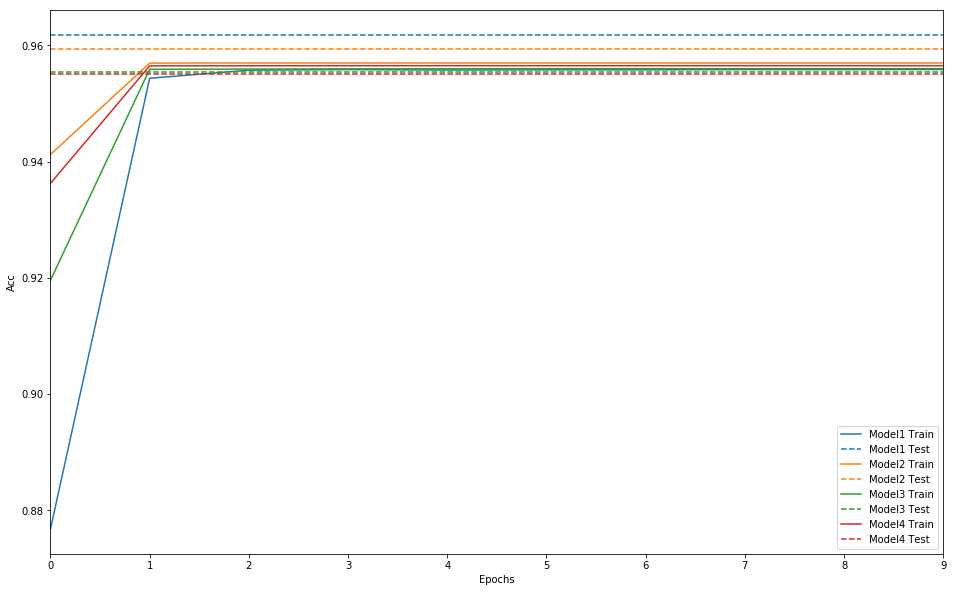

In [43]:
plot_history([('model1', model1History),
              ('model2', model2History),
              ('model3', model3History),
              ('model4', model4History)])